In [13]:
import holidays
import datetime
import polars as pl
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
pl.Config.set_tbl_rows(30)
pl.Config.set_tbl_cols(90)

polars.config.Config

In [14]:
import os
os.getcwd()

'C:\\Users\\admin\\Desktop\\Hamid Mukhtar\\Misc\\MachineLearningProject\\FlightPricePrediction\\notebooks'

In [15]:
# Load the DataFrame
rawData = pl.read_csv(r'C:\\Users\\admin\\Desktop\\Hamid Mukhtar\\Misc\\MachineLearningProject\\FlightPricePrediction\\dataset\flightDataset.csv',
                      try_parse_dates=True, null_values=['None', 'None||None', 'None||None||None', 'None||None||None||None', '||', '||||'])
rawData.head()

legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
str,date,date,str,str,str,str,i64,bool,bool,bool,f64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,false,false,true,217.67,248.6,9,947,"""1650214620""","""2022-04-17T12:57:00.000-04:00""","""1650223560""","""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach"""
"""98685953630e772a098941b7190659…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,4,947,"""1650191400""","""2022-04-17T06:30:00.000-04:00""","""1650200400""","""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach"""
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,9,947,"""1650209700""","""2022-04-17T11:35:00.000-04:00""","""1650218700""","""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach"""
"""969a269d38eae583f455486fa90877…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,false,false,true,217.67,248.6,8,947,"""1650218340""","""2022-04-17T13:59:00.000-04:00""","""1650227460""","""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach"""
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,false,false,true,217.67,248.6,9,947,"""1650203940""","""2022-04-17T09:59:00.000-04:00""","""1650213180""","""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach"""


In [16]:
rawData.shape

(1048575, 27)

In [17]:
rawData = rawData[:100000]

In [18]:
rawDataInformation=pl.DataFrame({'columns': rawData.columns, 'dataTypes': rawData.dtypes, 
                                 'nonNullCount': [rawData[col].null_count() for col in rawData.columns], 
                                 'nonNullCountPercentage':[rawData[col].null_count()/len(rawData)*100 for col in rawData.columns]})
rawDataInformation

columns,dataTypes,nonNullCount,nonNullCountPercentage
str,object,i64,f64
"""legId""",String,0,0.0
"""searchDate""",Date,0,0.0
"""flightDate""",Date,0,0.0
"""startingAirport""",String,0,0.0
"""destinationAirport""",String,0,0.0
"""fareBasisCode""",String,0,0.0
"""travelDuration""",String,0,0.0
"""elapsedDays""",Int64,0,0.0
"""isBasicEconomy""",Boolean,0,0.0


In [19]:
rawData = rawData.with_columns([
    pl.col('segmentsEquipmentDescription').is_null().alias('missingValueSegmentsEquipmentDescription'),
    pl.col('totalTravelDistance').is_null().alias('missingValueTotalTravelDistance'),
    pl.col('segmentsDistance').is_null().alias('missingValueSegmentsDistance')
])

In [20]:
# Assuming rawData is your Polars DataFrame
# Create a mask for rows where segmentsEquipmentDescription is null
mask = rawData['segmentsEquipmentDescription'].is_null()

# Get unique starting airports, destination airports, and airlines where segmentsEquipmentDescription is null
starting_airport_list = rawData.filter(mask)['startingAirport'].unique().to_list()
destination_airport_list = rawData.filter(mask)['destinationAirport'].unique().to_list()
missing_value_airline_list = rawData.filter(mask)['segmentsAirlineName'].unique().to_list()

# Create a DataFrame to store the most common values for imputation
impute_values = []

# Loop through each airline, starting airport, and destination airport
for airline in missing_value_airline_list:
    for startairport in starting_airport_list:
        for endairport in destination_airport_list:
            # Filter data for the current combination
            temp_data = rawData.filter(
                (pl.col('startingAirport') == startairport) & 
                (pl.col('destinationAirport') == endairport)
            )

            # Get non-null segmentsEquipmentDescription and count occurrences
            most_common_value = (
                temp_data
                .filter(pl.col('segmentsEquipmentDescription').is_not_null())
                .group_by('segmentsEquipmentDescription')
                .agg(pl.len().alias('count'))  # Count occurrences
                .sort('count', descending=True)
                .head(1)
            )
            # If a most common value exists, store it for imputation
            if most_common_value.height > 0:
                common_value = most_common_value['segmentsEquipmentDescription'][0]
                impute_values.append((startairport, endairport, airline, common_value))

# Create a mapping from (startingAirport, destinationAirport, segmentsAirlineName) to common value
impute_dict = {(start, end, airline): value for start, end, airline, value in impute_values}

# Convert the mapping into a DataFrame for joining
impute_df = pl.DataFrame(
    impute_values,
    orient="row",
    schema=["startingAirport", "destinationAirport", "segmentsAirlineName", "commonValue"]
)

# Join the original DataFrame with the imputation DataFrame on the relevant columns
rawData = rawData.join(impute_df, on=["startingAirport", "destinationAirport", "segmentsAirlineName"], how="left")

# Fill nulls in segmentsEquipmentDescription using the commonValue from the joined DataFrame
rawData = rawData.with_columns(
    pl.when(pl.col('segmentsEquipmentDescription').is_null())
    .then(pl.col('commonValue'))
    .otherwise(pl.col('segmentsEquipmentDescription'))
    .alias('segmentsEquipmentDescription')
)

# Drop the auxiliary column used for imputation if not needed anymore
rawData = rawData.drop('commonValue')

# Display the updated DataFrame or perform further analysis
rawData.head()

legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,date,str,str,str,str,i64,bool,bool,bool,f64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,false,false,true,217.67,248.6,9,947,"""1650214620""","""2022-04-17T12:57:00.000-04:00""","""1650223560""","""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,4,947,"""1650191400""","""2022-04-17T06:30:00.000-04:00""","""1650200400""","""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,9,947,"""1650209700""","""2022-04-17T11:35:00.000-04:00""","""1650218700""","""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,false,false,true,217.67,248.6,8,947,"""1650218340""","""2022-04-17T13:59:00.000-04:00""","""1650227460""","""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,false,false,true,217.67,248.6,9,947,"""1650203940""","""2022-04-17T09:59:00.000-04:00""","""1650213180""","""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [21]:
mask = rawData['totalTravelDistance'].is_null()
uniqueStartingAirport=rawData.filter(mask)['startingAirport'].unique().to_list()
uniqueEndingAirport=rawData.filter(mask)['destinationAirport'].unique().to_list()

imputeValueList = []

for startairport in uniqueStartingAirport:
    for endairport in uniqueEndingAirport:
        temp_data = rawData.filter(
                (pl.col('startingAirport') == startairport) & 
                (pl.col('destinationAirport') == endairport)
            )
        most_common_value = (
                temp_data
                .filter(pl.col('totalTravelDistance').is_not_null())
                .group_by('totalTravelDistance')
                .agg(pl.len().alias('count'))  # Count occurrences
                .sort('count', descending=True)
                .head(1)
            )

        if most_common_value.height > 0:
            common_value = most_common_value['totalTravelDistance'][0]
            imputeValueList.append((startairport, endairport, common_value))

imputeDictionay = {(start, end): value for start, end, value in imputeValueList}

imputeDataframe = pl.DataFrame(
    imputeValueList,
    orient="row",
    schema=["startingAirport", "destinationAirport", "commonValue"]
) 

rawData = rawData.join(imputeDataframe, on=["startingAirport", "destinationAirport"], how="left")

rawData = rawData.with_columns(
    pl.when(pl.col('totalTravelDistance').is_null())
    .then(pl.col('commonValue'))
    .otherwise(pl.col('totalTravelDistance'))
    .alias('totalTravelDistance')
)

rawData = rawData.with_columns(
    pl.when(pl.col('segmentsDistance').is_null())
    .then(pl.col('commonValue'))
    .otherwise(pl.col('segmentsDistance'))
    .alias('segmentsDistance')
)

rawData = rawData.drop('commonValue')

rawData.head()

legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,date,str,str,str,str,i64,bool,bool,bool,f64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,false,false,true,217.67,248.6,9,947,"""1650214620""","""2022-04-17T12:57:00.000-04:00""","""1650223560""","""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,4,947,"""1650191400""","""2022-04-17T06:30:00.000-04:00""","""1650200400""","""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,9,947,"""1650209700""","""2022-04-17T11:35:00.000-04:00""","""1650218700""","""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,false,false,true,217.67,248.6,8,947,"""1650218340""","""2022-04-17T13:59:00.000-04:00""","""1650227460""","""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,false,false,true,217.67,248.6,9,947,"""1650203940""","""2022-04-17T09:59:00.000-04:00""","""1650213180""","""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [22]:
for i,j in enumerate(rawData['segmentsEquipmentDescription']):
    if j.startswith('||'):
        temp=j.split('||')
        temp.insert(0, j.split('||')[1])
        newValue='|'.join(temp)
        rawData[i, 'segmentsEquipmentDescription']=newValue
    elif j.endswith('||'):
        temp=j.split('||')
        temp.append(temp[0])
        newValue='|'.join(temp)
        rawData[i, 'segmentsEquipmentDescription']=newValue

In [23]:
year=rawData['searchDate'].dt.year()
month=rawData['searchDate'].dt.month()
day=rawData['searchDate'].dt.day()

In [24]:
yearColumn = pl.Series("searchDateYear", year)
monthColumn = pl.Series("searchDateMonth", month)
daysColumn = pl.Series("searchDateDay", day)

In [25]:
rawData.insert_column(2, yearColumn)
rawData.insert_column(3, monthColumn)
rawData.insert_column(4, daysColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,str,str,str,str,i64,bool,bool,bool,f64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,false,false,true,217.67,248.6,9,947,"""1650214620""","""2022-04-17T12:57:00.000-04:00""","""1650223560""","""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,4,947,"""1650191400""","""2022-04-17T06:30:00.000-04:00""","""1650200400""","""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,9,947,"""1650209700""","""2022-04-17T11:35:00.000-04:00""","""1650218700""","""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,false,false,true,217.67,248.6,8,947,"""1650218340""","""2022-04-17T13:59:00.000-04:00""","""1650227460""","""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,false,false,true,217.67,248.6,9,947,"""1650203940""","""2022-04-17T09:59:00.000-04:00""","""1650213180""","""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [26]:
flightDateYear=rawData['flightDate'].dt.year()
flightDateMonth=rawData['flightDate'].dt.month()
flightDateDay=rawData['flightDate'].dt.day()

In [27]:
flightDateYearColumn = pl.Series("flightDateYear", flightDateYear)
flightDateMonthColumn = pl.Series("flightDateMonth", flightDateMonth)
flightDateDaysColumn = pl.Series("flightDateDay", flightDateDay)

In [28]:
rawData.insert_column(6, flightDateYearColumn)
rawData.insert_column(7, flightDateMonthColumn)
rawData.insert_column(8, flightDateDaysColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,i64,bool,bool,bool,f64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,false,false,true,217.67,248.6,9,947,"""1650214620""","""2022-04-17T12:57:00.000-04:00""","""1650223560""","""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,4,947,"""1650191400""","""2022-04-17T06:30:00.000-04:00""","""1650200400""","""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,false,false,true,217.67,248.6,9,947,"""1650209700""","""2022-04-17T11:35:00.000-04:00""","""1650218700""","""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,false,false,true,217.67,248.6,8,947,"""1650218340""","""2022-04-17T13:59:00.000-04:00""","""1650227460""","""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,false,false,true,217.67,248.6,9,947,"""1650203940""","""2022-04-17T09:59:00.000-04:00""","""1650213180""","""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [29]:
travelDurationDays=[]
for i in rawData['travelDuration']:
    if 'D' in i:
        travelDurationDays.append(int(i.split('P')[1].split('D')[0]))
    else:
        travelDurationDays.append(0)

In [30]:
travelDurationHours=[]
for i in rawData['travelDuration']:
    if 'D' in i and 'H' in i:
        travelDurationHours.append(int("P1DT2H6M".split('P')[1].split('D')[1].split('T')[1].split('H')[0]))
    elif 'D' in i and 'H' not in i:
        travelDurationHours.append(0)
    elif 'D' not in i and 'H' in i:
        travelDurationHours.append(int(i.split('T')[1].split('H')[0]))
    else:
        travelDurationHours.append(0)

In [31]:
travelDurationMinutes=[]
for i in rawData['travelDuration']:
    if 'D' in i and 'H' not in i and 'M' in i:
        travelDurationMinutes.append(int(i.split('T')[1].split('M')[0]))
    elif 'D' in i and 'H' in i and 'M' in i:
        travelDurationMinutes.append(int(i.split('H')[1].split('M')[0]))
    elif 'D' not in i and 'H' in i and 'M' in i:
        travelDurationMinutes.append(int(i.split('H')[1].split('M')[0]))
    elif 'D' not in i and 'H' not in i and 'M' in i:
        travelDurationMinutes.append(int(i.split('T')[1].split('M')[0]))
    else:
        travelDurationMinutes.append(0)

In [32]:
travelDurationDaysColumn = pl.Series("travelDurationDays", travelDurationDays)
travelDurationHoursColumn = pl.Series("travelDurationHours", travelDurationHours)
travelDurationMinutesColumn = pl.Series("travelDurationMinutes", travelDurationMinutes)

In [33]:
rawData.insert_column(13, travelDurationDaysColumn)
rawData.insert_column(14, travelDurationHoursColumn)
rawData.insert_column(15, travelDurationMinutesColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""","""2022-04-17T12:57:00.000-04:00""","""1650223560""","""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""","""2022-04-17T06:30:00.000-04:00""","""1650200400""","""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""","""2022-04-17T11:35:00.000-04:00""","""1650218700""","""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""","""2022-04-17T13:59:00.000-04:00""","""1650227460""","""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,2,34,0,false,false,true,217.67,248.6,9,947,"""1650203940""","""2022-04-17T09:59:00.000-04:00""","""1650213180""","""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [34]:
segmentsDepartureTimeEpochSecondsList = [i.split('||') for i in rawData['segmentsDepartureTimeEpochSeconds']]

In [35]:
firstDepartureTimeEpochSeconds=[]
for departure in segmentsDepartureTimeEpochSecondsList:
    if len(departure) >= 1:
        firstDepartureTimeEpochSeconds.append(int(departure[0]))
    else:
        firstDepartureTimeEpochSeconds.append(0)

In [36]:
secondDepartureTimeEpochSeconds=[]
for departure in segmentsDepartureTimeEpochSecondsList:
    if len(departure) > 1:
        secondDepartureTimeEpochSeconds.append(int(departure[1]))
    else:
        secondDepartureTimeEpochSeconds.append(0)

In [37]:
thirdDepartureTimeEpochSeconds=[]
for departure in segmentsDepartureTimeEpochSecondsList:
    if len(departure) > 2:
        thirdDepartureTimeEpochSeconds.append(int(departure[2]))
    else:
        thirdDepartureTimeEpochSeconds.append(0)

In [38]:
forthDepartureTimeEpochSeconds=[]
for departure in segmentsDepartureTimeEpochSecondsList:
    if len(departure) > 3:
        forthDepartureTimeEpochSeconds.append(int(departure[-1]))
    else:
        forthDepartureTimeEpochSeconds.append(0)

In [39]:
firstDepartureTimeEpochSecondsColumn=pl.Series("firstDepartureTimeEpochSeconds", firstDepartureTimeEpochSeconds)
secondDepartureTimeEpochSecondsColumn=pl.Series("secondDepartureTimeEpochSeconds", secondDepartureTimeEpochSeconds)
thirdDepartureTimeEpochSecondsColumn=pl.Series("thirdDepartureTimeEpochSeconds", thirdDepartureTimeEpochSeconds)
forthDepartureTimeEpochSecondsColumn=pl.Series("forthDepartureTimeEpochSeconds", forthDepartureTimeEpochSeconds)

In [40]:
rawData.insert_column(25, firstDepartureTimeEpochSecondsColumn)
rawData.insert_column(26, secondDepartureTimeEpochSecondsColumn)
rawData.insert_column(27, thirdDepartureTimeEpochSecondsColumn)
rawData.insert_column(28, forthDepartureTimeEpochSecondsColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""","""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""","""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""","""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""","""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,2,34,0,false,false,true,217.67,248.6,9,947,"""1650203940""",1650203940,0,0,0,"""2022-04-17T09:59:00.000-04:00""","""1650213180""","""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [41]:
segmentsArrivalTimeEpochSecondsList = [i.split('||') for i in rawData['segmentsArrivalTimeEpochSeconds']]

In [42]:
firstArrivalTimeEpochSeconds=[]
for arrival in segmentsArrivalTimeEpochSecondsList:
    if len(arrival) >= 1:
        firstArrivalTimeEpochSeconds.append(int(arrival[0]))
    else:
        firstArrivalTimeEpochSeconds.append(0)

In [43]:
secondArrivalTimeEpochSeconds=[]
for arrival in segmentsArrivalTimeEpochSecondsList:
    if len(arrival) > 1:
        secondArrivalTimeEpochSeconds.append(int(arrival[1]))
    else:
        secondArrivalTimeEpochSeconds.append(0)

In [44]:
thirdArrivalTimeEpochSeconds=[]
for arrival in segmentsArrivalTimeEpochSecondsList:
    if len(arrival) > 2:
        thirdArrivalTimeEpochSeconds.append(int(arrival[2]))
    else:
        thirdArrivalTimeEpochSeconds.append(0)

In [45]:
forthArrivalTimeEpochSeconds=[]
for arrival in segmentsArrivalTimeEpochSecondsList:
    if len(arrival) > 3:
        forthArrivalTimeEpochSeconds.append(int(arrival[-1]))
    else:
        forthArrivalTimeEpochSeconds.append(0)

In [46]:
firstArrivalTimeEpochSecondsColumn=pl.Series("firstArrivalTimeEpochSeconds", firstArrivalTimeEpochSeconds)
secondArrivalTimeEpochSecondsColumn=pl.Series("secondArrivalTimeEpochSeconds", secondArrivalTimeEpochSeconds)
thirdArrivalTimeEpochSecondsColumn=pl.Series("thirdArrivalTimeEpochSeconds", thirdArrivalTimeEpochSeconds)
forthArrivalTimeEpochSecondsColumn=pl.Series("forthArrivalTimeEpochSeconds", forthArrivalTimeEpochSeconds)

In [47]:
rawData.insert_column(31, firstArrivalTimeEpochSecondsColumn)
rawData.insert_column(32, secondArrivalTimeEpochSecondsColumn)
rawData.insert_column(33, thirdArrivalTimeEpochSecondsColumn)
rawData.insert_column(34, forthArrivalTimeEpochSecondsColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""",1650227460,0,0,0,"""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,2,34,0,false,false,true,217.67,248.6,9,947,"""1650203940""",1650203940,0,0,0,"""2022-04-17T09:59:00.000-04:00""","""1650213180""",1650213180,0,0,0,"""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [48]:
viaStopList=[i.split('||') for i in rawData['segmentsArrivalAirportCode']]

In [49]:
firstStop=[]
for stop in viaStopList:
    if len(stop) > 1:
        temp=stop[:1]
        firstStop.append(temp[0])
    else:
        firstStop.append(0)

In [50]:
secondStop=[]
for stop in viaStopList:
    if len(stop) > 2:
        temp=stop[:2]
        secondStop.append(temp[1])
    else:
        secondStop.append(0)

In [51]:
thirdStop=[]
for stop in viaStopList:
    if len(stop) > 3:
        temp=stop[:3]
        thirdStop.append(temp[2])
    else:
        thirdStop.append(0)

In [52]:
firstStopcolumn = pl.Series("firstStop", firstStop, strict=False)
secondStopcolumn = pl.Series("secondStop", secondStop, strict=False)
thirdStopcolumn = pl.Series("thirdStop", thirdStop, strict=False)

In [53]:
rawData.insert_column(10, firstStopcolumn)
rawData.insert_column(11, secondStopcolumn)
rawData.insert_column(12, thirdStopcolumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""",1650227460,0,0,0,"""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,2,34,0,false,false,true,217.67,248.6,9,947,"""1650203940""",1650203940,0,0,0,"""2022-04-17T09:59:00.000-04:00""","""1650213180""",1650213180,0,0,0,"""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [54]:
segmentsAirlineNamesList=[i.split('||') for i in rawData['segmentsAirlineName']]

In [55]:
firstAirLine=[]
for airline in segmentsAirlineNamesList:
    if len(airline) >= 1:
        firstAirLine.append(airline[0])
    else:
        firstAirLine.append('NA')

In [56]:
secondAirline=[]
for airline in segmentsAirlineNamesList:
    if len(airline) > 1:
        secondAirline.append(airline[1])
    else:
        secondAirline.append('NA')

In [57]:
thirdAirline=[]
for airline in segmentsAirlineNamesList:
    if len(airline) > 2:
        thirdAirline.append(airline[2])
    else:
        thirdAirline.append('NA')

In [58]:
forthAirline=[]
for airline in segmentsAirlineNamesList:
    if len(airline) > 3:
        forthAirline.append(airline[-1])
    else:
        forthAirline.append('NA')

In [59]:
firstAirLineColumn = pl.Series("firstAirLine", firstAirLine)
secondAirlineColumn = pl.Series("secondAirline", secondAirline)
thirdAirlineColumn = pl.Series("thirdAirline", thirdAirline)
forthAirlineColumn = pl.Series("forthAirline", forthAirline)

In [60]:
rawData.insert_column(42, firstAirLineColumn)
rawData.insert_column(43, secondAirlineColumn)
rawData.insert_column(44, thirdAirlineColumn)
rawData.insert_column(45, forthAirlineColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""",1650227460,0,0,0,"""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,2,34,0,false,false,true,217.67,248.6,9,947,"""1650203940""",1650203940,0,0,0,"""2022-04-17T09:59:00.000-04:00""","""1650213180""",1650213180,0,0,0,"""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [61]:
segmentsAirlineCodeList=[i.split('||') for i in rawData['segmentsAirlineCode']]

In [62]:
firstAirlineCode=[]
for airlineCode in segmentsAirlineCodeList:
    if len(airlineCode) >= 1:
        firstAirlineCode.append(airlineCode[0])
    else:
        firstAirlineCode.append('NA')

In [63]:
secondAirlineCode=[]
for airlineCode in segmentsAirlineCodeList:
    if len(airlineCode) > 1:
        secondAirlineCode.append(airlineCode[1])
    else:
        secondAirlineCode.append('NA')

In [64]:
thirdAirlineCode=[]
for airlineCode in segmentsAirlineCodeList:
    if len(airlineCode) > 2:
        thirdAirlineCode.append(airlineCode[2])
    else:
        thirdAirlineCode.append('NA')

In [65]:
forthAirlineCode=[]
for airlineCode in segmentsAirlineCodeList:
    if len(airlineCode) > 3:
        forthAirlineCode.append(airlineCode[-1])
    else:
        forthAirlineCode.append('NA')

In [66]:
firstAirLineCodeColumn = pl.Series("firstAirLineCode", firstAirlineCode)
secondAirlineCodeColumn = pl.Series("secondAirlineCode", secondAirlineCode)
thirdAirlineCodeColumn = pl.Series("thirdAirlineCode", thirdAirlineCode)
forthAirlineCodeColumn = pl.Series("forthAirlineCode", forthAirlineCode)

In [67]:
rawData.insert_column(47, firstAirLineCodeColumn)
rawData.insert_column(48, secondAirlineCodeColumn)
rawData.insert_column(49, thirdAirlineCodeColumn)
rawData.insert_column(50, forthAirlineCodeColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""8940""","""947""","""coach""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""9000""","""947""","""coach""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""9000""","""947""","""coach""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""",1650227460,0,0,0,"""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""9120""","""947""","""coach""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,2,34,0,false,false,true,217.67,248.6,9,947,"""1650203940""",1650203940,0,0,0,"""2022-04-17T09:59:00.000-04:00""","""1650213180""",1650213180,0,0,0,"""2022-04-17T12:33:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""9240""","""947""","""coach""",false,false,false


In [68]:
segmentsCabinCodeList=[i.split('||') for i in rawData['segmentsCabinCode']]

In [69]:
firstCabinCode=[]
for cabinCode in segmentsCabinCodeList:
    if len(cabinCode) >= 1:
        firstCabinCode.append(cabinCode[0])
    else:
        firstCabinCode.append('NA')

In [70]:
secondCabinCode=[]
for cabinCode in segmentsCabinCodeList:
    if len(cabinCode) > 1:
        secondCabinCode.append(cabinCode[1])
    else:
        secondCabinCode.append('NA')

In [71]:
thirdCabinCode=[]
for cabinCode in segmentsCabinCodeList:
    if len(cabinCode) > 2:
        thirdCabinCode.append(cabinCode[2])
    else:
        thirdCabinCode.append('NA')

In [72]:
forthCabinCode=[]
for cabinCode in segmentsCabinCodeList:
    if len(cabinCode) > 3:
        forthCabinCode.append(cabinCode[-1])
    else:
        forthCabinCode.append('NA')

In [73]:
firstCabinCodeColumn=pl.Series("firstCabinCode", firstCabinCode)
secondCabinCodeColumn=pl.Series("secondCabinCode", secondCabinCode)
thirdCabinCodeColumn=pl.Series("thirdCabinCode", thirdCabinCode)
forthCabinCodeColumn=pl.Series("forthCabinCode", forthCabinCode)

In [74]:
rawData.insert_column(55, firstCabinCodeColumn)
rawData.insert_column(56, secondCabinCodeColumn)
rawData.insert_column(57, thirdCabinCodeColumn)
rawData.insert_column(58, forthCabinCodeColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""8940""","""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""9000""","""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""9000""","""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""",1650227460,0,0,0,"""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""9120""","""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""980370cf27c89b40d2833a1d5afc97…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H34M""",0,2,34,0,false,false,true,217.67,248.6,9,947,"""1650203940""",1650203940,0,0,0,"""2022-04-17T09:59:00.000-04:00""","""1650213180""",1650213180,0,0,0,

In [75]:
segmentsEquipmentDescriptionList = [i.split('||') for i in rawData['segmentsEquipmentDescription']]

In [76]:
firstSegmentsEquipmentDescription=[]
for airplane in segmentsEquipmentDescriptionList:
    if len(airplane) >= 1:
        firstSegmentsEquipmentDescription.append(airplane[0])
    else:
        firstSegmentsEquipmentDescription.append('NA')

In [77]:
secondSegmentsEquipmentDescription=[]
for airplane in segmentsEquipmentDescriptionList:
    if len(airplane) > 1:
        secondSegmentsEquipmentDescription.append(airplane[1])
    else:
        secondSegmentsEquipmentDescription.append('NA')

In [78]:
thirdSegmentsEquipmentDescription=[]
for airplane in segmentsEquipmentDescriptionList:
    if len(airplane) > 2:
        thirdSegmentsEquipmentDescription.append(airplane[2])
    else:
        thirdSegmentsEquipmentDescription.append('NA')

In [79]:
forthSegmentsEquipmentDescription=[]
for airplane in segmentsEquipmentDescriptionList:
    if len(airplane) > 3:
        forthSegmentsEquipmentDescription.append(airplane[-1])
    else:
        forthSegmentsEquipmentDescription.append('NA')

In [80]:
firstSegmentsEquipmentDescriptionColumn = pl.Series("firstSegmentsEquipmentDescription", firstSegmentsEquipmentDescription)
secondSegmentsEquipmentDescriptionColumn = pl.Series("secondSegmentsEquipmentDescription", secondSegmentsEquipmentDescription)
thirdSegmentsEquipmentDescriptionColumn = pl.Series("thirdSegmentsEquipmentDescription", thirdSegmentsEquipmentDescription)
forthSegmentsEquipmentDescriptionColumn = pl.Series("forthSegmentsEquipmentDescription", forthSegmentsEquipmentDescription)

In [81]:
rawData.insert_column(52, firstSegmentsEquipmentDescriptionColumn)
rawData.insert_column(53, secondSegmentsEquipmentDescriptionColumn)
rawData.insert_column(54, thirdSegmentsEquipmentDescriptionColumn)
rawData.insert_column(55, forthSegmentsEquipmentDescriptionColumn)

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""8940""","""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""9000""","""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""Boeing 757-200""","""NA""","""NA""","""NA""","""9000""","""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""",1650227460,0,0,0,"""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""9120""","""947""","""coach""","""coach""","""NA""",

In [82]:
segmentsDurationInSecondsList = [i.split('||') for i in rawData['segmentsDurationInSeconds']]

In [83]:
firstsegmentsDurationInSeconds=[]
for duration in segmentsDurationInSecondsList:
    if len(duration) >= 1:
        firstsegmentsDurationInSeconds.append(int(duration[0]))
    else:
        firstsegmentsDurationInSeconds.append(0)

In [84]:
secondsegmentsDurationInSeconds=[]
for duration in segmentsDurationInSecondsList:
    if len(duration) > 1:
        secondsegmentsDurationInSeconds.append(int(duration[1]))
    else:
        secondsegmentsDurationInSeconds.append(0)

In [85]:
thirdsegmentsDurationInSeconds=[]
for duration in segmentsDurationInSecondsList:
    if len(duration) > 2:
        thirdsegmentsDurationInSeconds.append(int(duration[2]))
    else:
        thirdsegmentsDurationInSeconds.append(0)

In [86]:
forthsegmentsDurationInSeconds=[]
for duration in segmentsDurationInSecondsList:
    if len(duration) > 3:
        forthsegmentsDurationInSeconds.append(int(duration[-1]))
    else:
        forthsegmentsDurationInSeconds.append(0)

In [87]:
firstsegmentsDurationInSecondsColumn=pl.Series("firstsegmentsDurationInSeconds", firstsegmentsDurationInSeconds)
secondsegmentsDurationInSecondsColumn=pl.Series("secondsegmentsDurationInSeconds", secondsegmentsDurationInSeconds)
thirdsegmentsDurationInSecondsColumn=pl.Series("thirdsegmentsDurationInSeconds", thirdsegmentsDurationInSeconds)
forthsegmentsDurationInSecondsColumn=pl.Series("forthsegmentsDurationInSeconds", forthsegmentsDurationInSeconds)

In [88]:
rawData.insert_column(57, firstsegmentsDurationInSecondsColumn)
rawData.insert_column(58, secondsegmentsDurationInSecondsColumn)
rawData.insert_column(59, thirdsegmentsDurationInSecondsColumn)
rawData.insert_column(60, forthsegmentsDurationInSecondsColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,segmentsDurationInSeconds,firstsegmentsDurationInSeconds,secondsegmentsDurationInSeconds,thirdsegmentsDurationInSeconds,forthsegmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""8940""",8940,0,0,0,"""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""Boeing 757-200""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""","""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:00""","""1650227460""",1650227460,0,0,0,"""2022-04-17T16:31:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA"

In [89]:
segmentsDistanceList = [i.split('||') for i in rawData['segmentsDistance']]

In [90]:
firstsegmentsDistance=[]
for firstDistance in segmentsDistanceList:
    if len(firstDistance) >= 1:
        firstsegmentsDistance.append(int(firstDistance[0]))
    else:
        firstsegmentsDistance.append(0)

In [91]:
secondsegmentsDistance=[]
for Distance in segmentsDistanceList:
    if len(Distance) > 1:
        secondsegmentsDistance.append(int(Distance[1]))
    else:
        secondsegmentsDistance.append(0)

In [92]:
thirdsegmentsDistance=[]
for Distance in segmentsDistanceList:
    if len(Distance) > 2:
        thirdsegmentsDistance.append(int(Distance[2]))
    else:
        thirdsegmentsDistance.append(0)

In [93]:
forthsegmentsDistance=[]
for Distance in segmentsDistanceList:
    if len(Distance) > 3:
        forthsegmentsDistance.append(int(Distance[-1]))
    else:
        forthsegmentsDistance.append(0)

In [94]:
firstsegmentsDistanceColumn=pl.Series("firstsegmentsDistance", firstsegmentsDistance)
secondsegmentsDistanceColumn=pl.Series("secondsegmentsDistance", secondsegmentsDistance)
thirdsegmentsDistanceColumn=pl.Series("thirdsegmentsDistance", thirdsegmentsDistance)
forthsegmentsDistanceColumn=pl.Series("forthsegmentsDistance", forthsegmentsDistance)

In [95]:
rawData.insert_column(62, firstsegmentsDistanceColumn)
rawData.insert_column(63, secondsegmentsDistanceColumn)
rawData.insert_column(64, thirdsegmentsDistanceColumn)
rawData.insert_column(65, forthsegmentsDistanceColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,segmentsDurationInSeconds,firstsegmentsDurationInSeconds,secondsegmentsDurationInSeconds,thirdsegmentsDurationInSeconds,forthsegmentsDurationInSeconds,segmentsDistance,firstsegmentsDistance,secondsegmentsDistance,thirdsegmentsDistance,forthsegmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""8940""",8940,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""Boeing 757-200""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,0,0,"""2022-04-17T13:59:00.000-04:

In [96]:
usHolidays = holidays.UnitedStates()

In [97]:
isFlightDateOnHoliday=[]
for date in rawData['flightDate']:
    if date in usHolidays:
        isFlightDateOnHoliday.append(1)
    else:
        isFlightDateOnHoliday.append(0)

In [98]:
isFlightDateOnHolidayColumn=pl.Series("isFlightDateOnHoliday", isFlightDateOnHoliday)
rawData.insert_column(6, isFlightDateOnHolidayColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,flightDate,isFlightDateOnHoliday,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,segmentsDurationInSeconds,firstsegmentsDurationInSeconds,secondsegmentsDurationInSeconds,thirdsegmentsDurationInSeconds,forthsegmentsDurationInSeconds,segmentsDistance,firstsegmentsDistance,secondsegmentsDistance,thirdsegmentsDistance,forthsegmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,date,i64,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""8940""",8940,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""Boeing 757-200""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,"""1650218340""",1650218340,0,

In [99]:
searchDateWeekday=[]
for date in rawData['searchDate']:
    searchDateWeekday.append(date.weekday())

In [100]:
searchDateWeekdayColumn=pl.Series("searchDateWeekday", searchDateWeekday)
rawData.insert_column(5, searchDateWeekdayColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,searchDateWeekday,flightDate,isFlightDateOnHoliday,flightDateYear,flightDateMonth,flightDateDay,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,segmentsDurationInSeconds,firstsegmentsDurationInSeconds,secondsegmentsDurationInSeconds,thirdsegmentsDurationInSeconds,forthsegmentsDurationInSeconds,segmentsDistance,firstsegmentsDistance,secondsegmentsDistance,thirdsegmentsDistance,forthsegmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,i64,date,i64,i32,i8,i8,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""8940""",8940,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""Boeing 757-200""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,false,true,217.67,248.6,8,947,

In [101]:
flightDateWeekday=[]
for date in rawData['flightDate']:
    flightDateWeekday.append(date.weekday())

In [102]:
flightDateWeekdayColumn=pl.Series("flightDateWeekday", flightDateWeekday)
rawData.insert_column(11, flightDateWeekdayColumn)
rawData.head()

legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,searchDateWeekday,flightDate,isFlightDateOnHoliday,flightDateYear,flightDateMonth,flightDateDay,flightDateWeekday,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,segmentsDurationInSeconds,firstsegmentsDurationInSeconds,secondsegmentsDurationInSeconds,thirdsegmentsDurationInSeconds,forthsegmentsDurationInSeconds,segmentsDistance,firstsegmentsDistance,secondsegmentsDistance,thirdsegmentsDistance,forthsegmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,date,i32,i8,i8,i64,date,i64,i32,i8,i8,i64,str,str,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,str,str,str,str,str,bool,bool,bool
"""9ca0e81111c683bec1012473feefd2…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,6,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H29M""",0,2,29,0,false,false,true,217.67,248.6,9,947,"""1650214620""",1650214620,0,0,0,"""2022-04-17T12:57:00.000-04:00""","""1650223560""",1650223560,0,0,0,"""2022-04-17T15:26:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""8940""",8940,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98685953630e772a098941b7190659…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,6,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,4,947,"""1650191400""",1650191400,0,0,0,"""2022-04-17T06:30:00.000-04:00""","""1650200400""",1650200400,0,0,0,"""2022-04-17T09:00:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""Airbus A321""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""98d90cbc32bfbb05c2fc32897c7c10…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,6,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H30M""",0,2,30,0,false,false,true,217.67,248.6,9,947,"""1650209700""",1650209700,0,0,0,"""2022-04-17T11:35:00.000-04:00""","""1650218700""",1650218700,0,0,0,"""2022-04-17T14:05:00.000-04:00""","""BOS""","""ATL""","""Delta""","""Delta""","""NA""","""NA""","""NA""","""DL""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""Boeing 757-200""","""NA""","""NA""","""NA""","""9000""",9000,0,0,0,"""947""",947,0,0,0,"""coach""","""coach""","""NA""","""NA""","""NA""",false,false,false
"""969a269d38eae583f455486fa90877…",2022-04-16,2022,4,16,5,2022-04-17,0,2022,4,17,6,"""ATL""","""0""","""0""","""0""","""BOS""","""LA0NX0MC""","""PT2H32M""",0,2,32,0,false,

In [103]:
rawData.describe()

statistic,legId,searchDate,searchDateYear,searchDateMonth,searchDateDay,searchDateWeekday,flightDate,isFlightDateOnHoliday,flightDateYear,flightDateMonth,flightDateDay,flightDateWeekday,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,fareBasisCode,travelDuration,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,firstAirLine,secondAirline,thirdAirline,forthAirline,segmentsAirlineCode,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,segmentsEquipmentDescription,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,segmentsDurationInSeconds,firstsegmentsDurationInSeconds,secondsegmentsDurationInSeconds,thirdsegmentsDurationInSeconds,forthsegmentsDurationInSeconds,segmentsDistance,firstsegmentsDistance,secondsegmentsDistance,thirdsegmentsDistance,forthsegmentsDistance,segmentsCabinCode,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
str,str,str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64
"""count""","""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,"""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,"""100000""",100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""","""100000""",100000.0,100000.0,100000.0,100000.0,"""100000""",100000.0,100000.0,100000.0,100000.0,"""100000""","""100000""","""100000""","""100000""","""100000""",100000.0,100000.0,100000.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",null,"""2022-04-16 02:57:44.352000""",2022.0,4.0,16.12343,5.12343,"""2022-04-21 02:06:47.519000""",0.0,2022.0,4.0,21.08805,2.32694,null,null,null,null,null,null,null,0.00004,6.37586,28.88957,0.14101,0.05496,0.00004,0.26825,322.215196,371.376322,4.70535,1566.73968,null,1.6506e9,1.2078e9,1.1672e8,5.7937e6,null,null,1.6506e9,1.2078e9,1.1672e8,5.7937e6,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9512.1024,6857.115,493.9842,20.9124,null,917.3878,608.44865,41.15861,1.5716,null,null,null,null,null,0.02707,0.05041,0.05041
"""std""",null,null,0.0,0.0,0.328932,0.328932,null,0.0,0.0,0.0,2.908918,2.148678,null,null,null,null,null,null,null,0.006324,3.430532,17.177065,0.34

In [104]:
processedData = rawData[['searchDateDay', 'searchDateWeekday', 'isFlightDateOnHoliday', 'flightDateDay', 'flightDateWeekday', 'startingAirport', 
                         'firstStop', 'secondStop', 'thirdStop', 'destinationAirport', 'travelDurationDays', 'travelDurationHours', 
                         'travelDurationMinutes', 'elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare', 'seatsRemaining',
                         'totalTravelDistance', 'firstDepartureTimeEpochSeconds', 'secondDepartureTimeEpochSeconds', 'thirdDepartureTimeEpochSeconds',
                         'forthDepartureTimeEpochSeconds', 'firstArrivalTimeEpochSeconds', 'secondArrivalTimeEpochSeconds', 'thirdArrivalTimeEpochSeconds',
                         'forthArrivalTimeEpochSeconds', 'firstAirLine', 'secondAirline', 'thirdAirline', 'forthAirline', 'firstAirLineCode', 'secondAirlineCode',
                         'thirdAirlineCode', 'forthAirlineCode', 'firstSegmentsEquipmentDescription', 'secondSegmentsEquipmentDescription', 
                         'thirdSegmentsEquipmentDescription', 'forthSegmentsEquipmentDescription', 'firstsegmentsDurationInSeconds', 'secondsegmentsDurationInSeconds',
                         'thirdsegmentsDurationInSeconds', 'forthsegmentsDurationInSeconds', 'firstsegmentsDistance', 'secondsegmentsDistance', 'thirdsegmentsDistance',
                         'forthsegmentsDistance', 'firstCabinCode', 'secondCabinCode', 'thirdCabinCode', 'forthCabinCode', 'missingValueSegmentsEquipmentDescription',
                         'missingValueTotalTravelDistance', 'missingValueSegmentsDistance']]

In [105]:
processedData.head()

searchDateDay,searchDateWeekday,isFlightDateOnHoliday,flightDateDay,flightDateWeekday,startingAirport,firstStop,secondStop,thirdStop,destinationAirport,travelDurationDays,travelDurationHours,travelDurationMinutes,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,firstDepartureTimeEpochSeconds,secondDepartureTimeEpochSeconds,thirdDepartureTimeEpochSeconds,forthDepartureTimeEpochSeconds,firstArrivalTimeEpochSeconds,secondArrivalTimeEpochSeconds,thirdArrivalTimeEpochSeconds,forthArrivalTimeEpochSeconds,firstAirLine,secondAirline,thirdAirline,forthAirline,firstAirLineCode,secondAirlineCode,thirdAirlineCode,forthAirlineCode,firstSegmentsEquipmentDescription,secondSegmentsEquipmentDescription,thirdSegmentsEquipmentDescription,forthSegmentsEquipmentDescription,firstsegmentsDurationInSeconds,secondsegmentsDurationInSeconds,thirdsegmentsDurationInSeconds,forthsegmentsDurationInSeconds,firstsegmentsDistance,secondsegmentsDistance,thirdsegmentsDistance,forthsegmentsDistance,firstCabinCode,secondCabinCode,thirdCabinCode,forthCabinCode,missingValueSegmentsEquipmentDescription,missingValueTotalTravelDistance,missingValueSegmentsDistance
i8,i64,i64,i8,i64,str,str,str,str,str,i64,i64,i64,i64,bool,bool,bool,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,bool,bool,bool
16,5,0,17,6,"""ATL""","""0""","""0""","""0""","""BOS""",0,2,29,0,false,false,true,217.67,248.6,9,947,1650214620,0,0,0,1650223560,0,0,0,"""Delta""","""NA""","""NA""","""NA""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""NA""","""NA""","""NA""",8940,0,0,0,947,0,0,0,"""coach""","""NA""","""NA""","""NA""",false,false,false
16,5,0,17,6,"""ATL""","""0""","""0""","""0""","""BOS""",0,2,30,0,false,false,true,217.67,248.6,4,947,1650191400,0,0,0,1650200400,0,0,0,"""Delta""","""NA""","""NA""","""NA""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""NA""","""NA""","""NA""",9000,0,0,0,947,0,0,0,"""coach""","""NA""","""NA""","""NA""",false,false,false
16,5,0,17,6,"""ATL""","""0""","""0""","""0""","""BOS""",0,2,30,0,false,false,true,217.67,248.6,9,947,1650209700,0,0,0,1650218700,0,0,0,"""Delta""","""NA""","""NA""","""NA""","""DL""","""NA""","""NA""","""NA""","""Boeing 757-200""","""NA""","""NA""","""NA""",9000,0,0,0,947,0,0,0,"""coach""","""NA""","""NA""","""NA""",false,false,false
16,5,0,17,6,"""ATL""","""0""","""0""","""0""","""BOS""",0,2,32,0,false,false,true,217.67,248.6,8,947,1650218340,0,0,0,1650227460,0,0,0,"""Delta""","""NA""","""NA""","""NA""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""NA""","""NA""","""NA""",9120,0,0,0,947,0,0,0,"""coach""","""NA""","""NA""","""NA""",false,false,false
16,5,0,17,6,"""ATL""","""0""","""0""","""0""","""BOS""",0,2,34,0,false,false,true,217.67,248.6,9,947,1650203940,0,0,0,1650213180,0,0,0,"""Delta""","""NA""","""NA""","""NA""","""DL""","""NA""","""NA""","""NA""","""Airbus A321""","""NA""","""NA""","""NA""",9240,0,0,0,947,0,0,0,"""coach""","""NA""","""NA""","""NA""",false,false,false


In [106]:
processedData = processedData.with_columns(
    pl.col("isBasicEconomy").cast(pl.Int64),
    pl.col("isRefundable").cast(pl.Int64),
    pl.col("isNonStop").cast(pl.Int64),
    pl.col("missingValueSegmentsEquipmentDescription").cast(pl.Int64),
    pl.col("missingValueTotalTravelDistance").cast(pl.Int64),
    pl.col("missingValueSegmentsDistance").cast(pl.Int64)
    
)

In [107]:
processedData = processedData.with_columns(
    pl.when(pl.col('startingAirport') == "0").then(0).otherwise(pl.len().over('startingAirport') / pl.len()).alias('startingAirport'),
    pl.when(pl.col('firstStop') == "0").then(0).otherwise(pl.len().over('firstStop') / pl.len()).alias('firstStop'),
    pl.when(pl.col('secondStop') == "0").then(0).otherwise(pl.len().over('secondStop') / pl.len()).alias('secondStop'),
    pl.when(pl.col('thirdStop') == "0").then(0).otherwise(pl.len().over('thirdStop') / pl.len()).alias('thirdStop'),
    pl.when(pl.col('destinationAirport') == "0").then(0).otherwise(pl.len().over('destinationAirport') / pl.len()).alias('destinationAirport')
)

In [108]:
processedData = processedData.with_columns(
    pl.when(pl.col('firstAirLine') == "NA").then(0).otherwise(pl.len().over('firstAirLine') / pl.len()).alias('firstAirLine'),
    pl.when(pl.col('secondAirline') == "NA").then(0).otherwise(pl.len().over('secondAirline') / pl.len()).alias('secondAirline'),
    pl.when(pl.col('thirdAirline') == "NA").then(0).otherwise(pl.len().over('thirdAirline') / pl.len()).alias('thirdAirline'),
    pl.when(pl.col('forthAirline') == "NA").then(0).otherwise(pl.len().over('forthAirline') / pl.len()).alias('forthAirline')
)

In [109]:
processedData = processedData.with_columns(
    pl.when(pl.col('firstAirLineCode') == "NA").then(0).otherwise(pl.len().over('firstAirLineCode') / pl.len()).alias('firstAirLineCode'),
    pl.when(pl.col('secondAirlineCode') == "NA").then(0).otherwise(pl.len().over('secondAirlineCode') / pl.len()).alias('secondAirlineCode'),
    pl.when(pl.col('thirdAirlineCode') == "NA").then(0).otherwise(pl.len().over('thirdAirlineCode') / pl.len()).alias('thirdAirlineCode'),
    pl.when(pl.col('forthAirlineCode') == "NA").then(0).otherwise(pl.len().over('forthAirlineCode') / pl.len()).alias('forthAirlineCode')
)

In [110]:
processedData = processedData.with_columns(
    pl.when(pl.col('firstCabinCode') == "NA").then(0).otherwise(pl.len().over('firstCabinCode') / pl.len()).alias('firstCabinCode'),
    pl.when(pl.col('secondCabinCode') == "NA").then(0).otherwise(pl.len().over('secondCabinCode') / pl.len()).alias('secondCabinCode'),
    pl.when(pl.col('thirdCabinCode') == "NA").then(0).otherwise(pl.len().over('thirdCabinCode') / pl.len()).alias('thirdCabinCode'),
    pl.when(pl.col('forthCabinCode') == "NA").then(0).otherwise(pl.len().over('forthCabinCode') / pl.len()).alias('forthCabinCode')
)

In [111]:
processedData = processedData.with_columns(
    pl.when(pl.col('firstSegmentsEquipmentDescription') == "NA").then(0).otherwise(pl.len().over('firstSegmentsEquipmentDescription') / pl.len()).alias('firstSegmentsEquipmentDescription'),
    pl.when(pl.col('secondSegmentsEquipmentDescription') == "NA").then(0).otherwise(pl.len().over('secondSegmentsEquipmentDescription') / pl.len()).alias('secondSegmentsEquipmentDescription'),
    pl.when(pl.col('thirdSegmentsEquipmentDescription') == "NA").then(0).otherwise(pl.len().over('thirdSegmentsEquipmentDescription') / pl.len()).alias('thirdSegmentsEquipmentDescription'),
    pl.when(pl.col('forthSegmentsEquipmentDescription') == "NA").then(0).otherwise(pl.len().over('forthSegmentsEquipmentDescription') / pl.len()).alias('forthSegmentsEquipmentDescription')
)

In [112]:
processedDataInformation=pl.DataFrame({'columns': processedData.columns, 'dataTypes': processedData.dtypes, 
                                 'nonNullCount': [processedData[col].null_count() for col in processedData.columns], 
                                 'nonNullCountPercentage':[processedData[col].null_count()/len(processedData)*100 for col in processedData.columns]})
processedDataInformation

columns,dataTypes,nonNullCount,nonNullCountPercentage
str,object,i64,f64
"""searchDateDay""",Int8,0,0.0
"""searchDateWeekday""",Int64,0,0.0
"""isFlightDateOnHoliday""",Int64,0,0.0
"""flightDateDay""",Int8,0,0.0
"""flightDateWeekday""",Int64,0,0.0
"""startingAirport""",Float64,0,0.0
"""firstStop""",Float64,0,0.0
"""secondStop""",Float64,0,0.0
"""thirdStop""",Float64,0,0.0


In [113]:
spearman_corr=[]
for col in processedData.columns:
    spearman_corr.append(processedData.select(pl.corr(col, 'totalFare', method="pearson")))
correlationData = pd.DataFrame({'Columns': processedData.columns, 'Correlation': spearman_corr})
correlationData

,Columns,Correlation
0,searchDateDay,[[-0.0023184640363475245]]
1,searchDateWeekday,[[-0.0023184640363473935]]
2,isFlightDateOnHoliday,[[nan]]
3,flightDateDay,[[-0.03672787462990206]]
4,flightDateWeekday,[[0.1436132680288288]]
5,startingAirport,[[-0.049504984387397186]]
6,firstStop,[[0.01018959404620515]]
7,secondStop,[[0.2826401459942969]]
8,thirdStop,[[0.08169718870637885]]
9,destinationAirport,[[-0.14915254785255966]]


<Figure size 4000x1000 with 0 Axes>

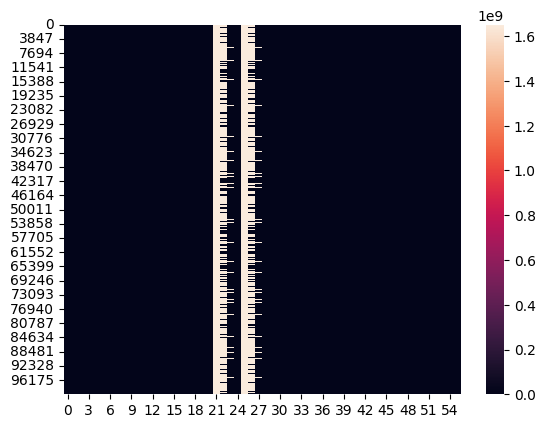

<Figure size 4000x1000 with 0 Axes>

In [114]:
sns.heatmap(processedData)
plt.figure(figsize=(40,10))

In [115]:
X = processedData.drop('totalFare')
y = processedData['totalFare']

In [116]:
selectKBest = SelectKBest(mutual_info_regression, k='all')
selectKBest.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000016C36A02020>)

In [117]:
selectKBest.get_feature_names_out()

array(['searchDateDay', 'searchDateWeekday', 'isFlightDateOnHoliday',
       'flightDateDay', 'flightDateWeekday', 'startingAirport',
       'firstStop', 'secondStop', 'thirdStop', 'destinationAirport',
       'travelDurationDays', 'travelDurationHours',
       'travelDurationMinutes', 'elapsedDays', 'isBasicEconomy',
       'isRefundable', 'isNonStop', 'baseFare', 'seatsRemaining',
       'totalTravelDistance', 'firstDepartureTimeEpochSeconds',
       'secondDepartureTimeEpochSeconds',
       'thirdDepartureTimeEpochSeconds', 'forthDepartureTimeEpochSeconds',
       'firstArrivalTimeEpochSeconds', 'secondArrivalTimeEpochSeconds',
       'thirdArrivalTimeEpochSeconds', 'forthArrivalTimeEpochSeconds',
       'firstAirLine', 'secondAirline', 'thirdAirline', 'forthAirline',
       'firstAirLineCode', 'secondAirlineCode', 'thirdAirlineCode',
       'forthAirlineCode', 'firstSegmentsEquipmentDescription',
       'secondSegmentsEquipmentDescription',
       'thirdSegmentsEquipmentDescription

In [118]:
selectKBest.get_params()

{'k': 'all',
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_regression(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None, n_jobs=None)>}

In [119]:
selectKBest.scores_

array([2.84235815e-02, 2.66393105e-02, 0.00000000e+00, 4.40951370e-01,
       2.86840074e-01, 9.47973188e-01, 1.17257958e+00, 2.27604904e-01,
       1.07546029e-02, 8.92651747e-01, 6.19753212e-04, 7.57085698e-01,
       3.19885163e-01, 9.31327264e-02, 9.95834593e-02, 1.62075629e-03,
       3.96582858e-01, 5.66936052e+00, 3.83574139e-01, 2.93273133e+00,
       7.54790761e-01, 1.18081863e+00, 2.48254656e-01, 1.36021948e-02,
       7.89495498e-01, 1.21732805e+00, 2.50058337e-01, 1.20815563e-02,
       5.94145844e-01, 8.76311187e-01, 2.13576731e-01, 1.14945752e-02,
       5.92011236e-01, 8.78187444e-01, 2.16364429e-01, 9.87868099e-03,
       5.87527364e-01, 7.77070514e-01, 1.76206283e-01, 1.33721374e-02,
       9.81449692e-01, 1.05719571e+00, 2.04392092e-01, 1.05178890e-02,
       1.81498250e+00, 1.47434590e+00, 2.30499114e-01, 1.22058906e-02,
       2.94947705e-02, 4.06160967e-01, 1.80104096e-01, 1.46169785e-02,
       4.76262770e-02, 1.66984549e-01, 1.65726216e-01])

In [120]:
featureSelectionData = pd.DataFrame({'Columns':selectKBest.get_feature_names_out(), 'Score':selectKBest.scores_})
featureSelectionData

,Columns,Score
0,searchDateDay,0.028424
1,searchDateWeekday,0.026639
2,isFlightDateOnHoliday,0.000000
3,flightDateDay,0.440951
4,flightDateWeekday,0.286840
5,startingAirport,0.947973
6,firstStop,1.172580
7,secondStop,0.227605
8,thirdStop,0.010755
9,destinationAirport,0.892652


In [121]:
selectedFeatureData = featureSelectionData[featureSelectionData['Score'] > 0.4]
selectedFeatureData

,Columns,Score
3,flightDateDay,0.440951
5,startingAirport,0.947973
6,firstStop,1.172580
9,destinationAirport,0.892652
11,travelDurationHours,0.757086
17,baseFare,5.669361
19,totalTravelDistance,2.932731
20,firstDepartureTimeEpochSeconds,0.754791
21,secondDepartureTimeEpochSeconds,1.180819
24,firstArrivalTimeEpochSeconds,0.789495


In [122]:
list(selectedFeatureData['Columns'])

['flightDateDay',
 'startingAirport',
 'firstStop',
 'destinationAirport',
 'travelDurationHours',
 'baseFare',
 'totalTravelDistance',
 'firstDepartureTimeEpochSeconds',
 'secondDepartureTimeEpochSeconds',
 'firstArrivalTimeEpochSeconds',
 'secondArrivalTimeEpochSeconds',
 'firstAirLine',
 'secondAirline',
 'firstAirLineCode',
 'secondAirlineCode',
 'firstSegmentsEquipmentDescription',
 'secondSegmentsEquipmentDescription',
 'firstsegmentsDurationInSeconds',
 'secondsegmentsDurationInSeconds',
 'firstsegmentsDistance',
 'secondsegmentsDistance',
 'secondCabinCode']

In [123]:
X_trial = processedData[list(selectedFeatureData['Columns'])]
y_trail = processedData['totalFare']

In [124]:
xtrainTrail, xtestTrail, ytrainTrail, ytestTrail = train_test_split(X_trial, y_trail, random_state=42, test_size=0.2)

In [125]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2)

In [126]:
rbScaler = RobustScaler()

In [127]:
xtrainScaled = rbScaler.fit_transform(xtrain)

In [128]:
xtestScaled = rbScaler.transform(xtest)

In [129]:
xtrainTrailScaled = rbScaler.fit_transform(xtrainTrail)

In [130]:
xtestTrailScaled = rbScaler.transform(xtestTrail)

In [131]:
def machineLearningRegressionModels(model, xtrain, xtest, ytrain, ytest):
    tempModel = model()
    tempModel.fit(xtrain, ytrain)
    pred = tempModel.predict(xtest)
    mae=mean_absolute_error(ytest, pred)
    mse=mean_squared_error(ytest, pred)
    rmse=root_mean_squared_error(ytest, pred)
    r2=r2_score(ytest, pred)
    Adj_r2=1 - (1-r2_score(ytest, pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    return mae, mse, rmse, r2, Adj_r2

In [132]:
listOfMachineLearningModels = [LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet, SGDRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
                               RandomForestRegressor, LinearSVR , SVR, XGBRegressor, XGBRFRegressor]
mae = []
mse = []
rmse = []
r2 = []
Adj_r2 = []
for model in listOfMachineLearningModels:
    tempModel = machineLearningRegressionModels(model, xtrain, xtest, ytrain, ytest)
    mae.append(tempModel[0])
    mse.append(tempModel[1])
    rmse.append(tempModel[2])
    r2.append(tempModel[3])
    Adj_r2.append(tempModel[4])

C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.069e+06, tolerance: 4.186e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.977e+06, tolerance: 4.186e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [133]:
listOfMachineLearningModelNames = ['LassoCV', 'RidgeCV', 'ElasticNetCV', 'Lasso', 'Ridge', 'ElasticNet', 'SGDRegressor', 'GradientBoostingRegressor', 
                                   'AdaBoostRegressor', 'RandomForestRegressor', 'LinearSVR', 'SVR',  'XGBRegressor', 'XGBRFRegressor']
modelDataFrame = pd.DataFrame({'Models': listOfMachineLearningModelNames, 'Mean Absolute Error': mae, 'Mean Squared Error':mse,
                                'Root Mean Squared Error': rmse, 'R2 Score': r2, 'Adjusted R2 Score': Adj_r2})
modelDataFrame

,Models,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Adjusted R2 Score
0,LassoCV,1.397055e+02,4.807210e+04,2.192535e+02,9.293192e-02,9.243275e-02
1,RidgeCV,3.510512e+10,1.476566e+21,3.842612e+10,-2.786120e+16,-2.787653e+16
2,ElasticNetCV,1.397055e+02,4.807210e+04,2.192535e+02,9.293192e-02,9.243275e-02
3,Lasso,4.618513e+00,7.330948e+01,8.562096e+00,9.986167e-01,9.986160e-01
4,Ridge,1.809823e+00,1.990547e+01,4.461555e+00,9.996244e-01,9.996242e-01
5,ElasticNet,4.517669e+00,6.990072e+01,8.360665e+00,9.986810e-01,9.986803e-01
6,SGDRegressor,2.279457e+27,5.593365e+54,2.365030e+27,-1.055407e+50,-1.055988e+50
7,GradientBoostingRegressor,2.499119e+00,2.044065e+01,4.521134e+00,9.996143e-01,9.996141e-01
8,AdaBoostRegressor,2.820472e+01,1.408145e+03,3.752525e+01,9.734298e-01,9.734152e-01
9,RandomForestRegressor,5.232999e-01,5.675766e+00,2.382387e+00,9.998929e-01,9.998928e-01


In [134]:
listOfMachineLearningModels = [LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet, SGDRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
                               RandomForestRegressor, LinearSVR, SVR, XGBRegressor, XGBRFRegressor]
maeScaled = []
mseScaled = []
rmseScaled = []
r2Scaled = []
r2Scaled = []
Adj_r2Scaled = []
for model in listOfMachineLearningModels:
    tempModel = machineLearningRegressionModels(model, xtrainScaled, xtestScaled, ytrain, ytest)
    maeScaled.append(tempModel[0])
    mseScaled.append(tempModel[1])
    rmseScaled.append(tempModel[2])
    r2Scaled.append(tempModel[3])
    Adj_r2Scaled.append(tempModel[4])

C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+07, tolerance: 4.186e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.167e+08, tolerance: 4.186e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [135]:
listOfMachineLearningModelNames = ['LassoCV', 'RidgeCV', 'ElasticNetCV', 'Lasso', 'Ridge', 'ElasticNet', 'SGDRegressor', 'GradientBoostingRegressor', 
                                   'AdaBoostRegressor', 'RandomForestRegressor', 'LinearSVR', 'SVR',  'XGBRegressor', 'XGBRFRegressor']
modelScaledDataFrame = pd.DataFrame({'Models': listOfMachineLearningModelNames, 'Mean Absolute Error': maeScaled, 'Mean Squared Error':mseScaled,
                                'Root Mean Squared Error': rmseScaled, 'R2 Score': r2Scaled, 'Adjusted R2 Score': Adj_r2Scaled})
modelScaledDataFrame

,Models,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Adjusted R2 Score
0,LassoCV,1.408754e+02,4.840125e+04,2.200028e+02,8.672122e-02,8.621864e-02
1,RidgeCV,1.706846e+09,1.113693e+19,3.337204e+09,-2.101417e+14,-2.102574e+14
2,ElasticNetCV,1.408754e+02,4.840125e+04,2.200028e+02,8.672122e-02,8.621864e-02
3,Lasso,4.061222e+00,5.384900e+01,7.338188e+00,9.989839e-01,9.989834e-01
4,Ridge,1.810807e+00,1.990730e+01,4.461760e+00,9.996244e-01,9.996242e-01
5,ElasticNet,4.861551e+01,6.128451e+03,7.828442e+01,8.843628e-01,8.842992e-01
6,SGDRegressor,8.228848e+25,9.862409e+52,3.140447e+26,-1.860929e+48,-1.861953e+48
7,GradientBoostingRegressor,2.500870e+00,2.027715e+01,4.503015e+00,9.996174e-01,9.996172e-01
8,AdaBoostRegressor,2.896315e+01,1.463880e+03,3.826069e+01,9.723782e-01,9.723630e-01
9,RandomForestRegressor,5.320701e-01,6.286327e+00,2.507255e+00,9.998814e-01,9.998813e-01


In [136]:
xtrainTrailScaled = rbScaler.fit_transform(xtrainTrail)

In [137]:
xtestTrailScaled = rbScaler.transform(xtestTrail)

In [138]:
listOfMachineLearningModels = [LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, ElasticNet, SGDRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
                               RandomForestRegressor, LinearSVR, SVR, XGBRegressor, XGBRFRegressor]
maeTrail = []
mseTrail = []
rmseTrail = []
r2Trail = []
Adj_r2Trail = []
for model in listOfMachineLearningModels:
    tempModel = machineLearningRegressionModels(model, xtrainTrailScaled, xtestTrailScaled, ytrain, ytest)
    maeTrail.append(tempModel[0])
    mseTrail.append(tempModel[1])
    rmseTrail.append(tempModel[2])
    r2Trail.append(tempModel[3])
    Adj_r2Trail.append(tempModel[4])

In [139]:
listOfMachineLearningModelNames = ['LassoCV', 'RidgeCV', 'ElasticNetCV', 'Lasso', 'Ridge', 'ElasticNet', 'SGDRegressor', 'GradientBoostingRegressor', 
                                   'AdaBoostRegressor', 'RandomForestRegressor', 'LinearSVR', 'SVR',  'XGBRegressor', 'XGBRFRegressor']
modelTrailDataFrame = pd.DataFrame({'Models': listOfMachineLearningModelNames, 'Mean Absolute Error': maeTrail, 'Mean Squared Error':mseTrail,
                                'Root Mean Squared Error': rmseTrail, 'R2 Score': r2Trail, 'Adjusted R2 Score': Adj_r2Trail})
modelTrailDataFrame

,Models,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Adjusted R2 Score
0,LassoCV,4.680490,73.933220,8.598443,0.998605,0.998604
1,RidgeCV,4.478045,67.790479,8.233497,0.998721,0.998720
2,ElasticNetCV,28.499598,2065.908974,45.452271,0.961019,0.960997
3,Lasso,6.076370,133.602820,11.558669,0.997479,0.997478
4,Ridge,4.478045,67.790479,8.233497,0.998721,0.998720
5,ElasticNet,48.711222,6033.704542,77.676924,0.886151,0.886088
6,SGDRegressor,4.310655,68.642672,8.285087,0.998705,0.998704
7,GradientBoostingRegressor,2.581547,23.282735,4.825219,0.999561,0.999560
8,AdaBoostRegressor,29.181701,1440.695048,37.956489,0.972816,0.972801
9,RandomForestRegressor,0.571658,6.944066,2.635159,0.999869,0.999869


In [140]:
param_distributions = {
    'alpha': np.logspace(-4, 1, 10),  # Regularization strength
    'l1_ratio': np.linspace(0, 1, 10),  # Balance between L1 and L2 regularization
    'max_iter': [1000, 2000, 3000]  # Number of iterations for convergence
}

In [141]:
elasticNetModel = ElasticNet()

In [142]:
search = RandomizedSearchCV(elasticNetModel, param_distributions, n_iter=100,
                            scoring='r2', cv=10,
                            random_state=42)

In [143]:
search.fit(xtrainTrailScaled, ytrainTrail)

C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+08, tolerance: 3.759e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+08, tolerance: 3.774e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solv

RandomizedSearchCV(cv=10, estimator=ElasticNet(), n_iter=100,
                   param_distributions={'alpha': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                                        'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'max_iter': [1000, 2000, 3000]},
                   random_state=42, scoring='r2')

In [144]:
search.best_params_

{'max_iter': 2000, 'l1_ratio': 0.8888888888888888, 'alpha': 0.0001}

In [145]:
search.best_score_

0.9987330914790148

In [146]:
ypred=search.predict(xtestTrailScaled)

In [147]:
r2_score(ytestTrail, ypred)

0.9987208664721675

In [148]:
mean_absolute_error(ytestTrail, ypred)

4.477727763767651

In [149]:
mean_squared_error(ytestTrail, ypred)

67.79054206694688

In [150]:
root_mean_squared_error(ytestTrail, ypred)

8.233501203433864

In [151]:
search.score(xtrainTrailScaled, ytrainTrail)

0.9987369492305193

In [152]:
search.score(xtestTrailScaled, ytestTrail)

0.9987208664721675

In [153]:
scores = cross_val_score(elasticNetModel, X, y, cv=10)

C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+06, tolerance: 4.552e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.411e+06, tolerance: 4.795e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

In [154]:
scores.mean()

0.9984792393411064

C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.816e+05, tolerance: 4.103e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.746e+05, tolerance: 1.079e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\envs\projectEnv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

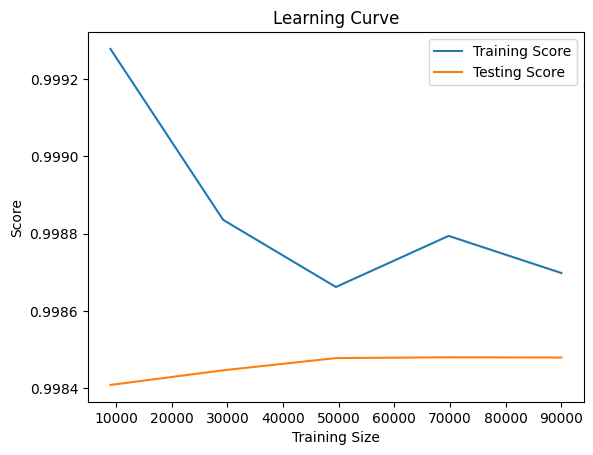

In [155]:
train_sizes, train_scores, test_scores = learning_curve(elasticNetModel, X, y, cv=10)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Testing Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()